In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

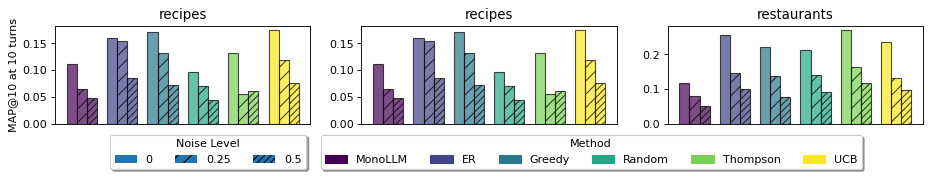

In [26]:
def map_10_noise():
    # MAP@10 big plot
    folder_path = "./"
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 2), dpi=80)  

    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(datasets[axis_num])

        x = np.arange(len(methods))  # the label locations
        width = 0.25  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels)))
        results_error = np.zeros((len(methods), len(noise_levels)))

        for noise_count, noise_level in enumerate(noise_levels): # Fill results array
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/noise{noise_level}/aggregated_results.csv")
            for row_num in range(len(exp_results)):
                results[row_num, noise_count] = exp_results.loc[row_num, "map@9"]
                # results_error[row_num, noise_count] = exp_results.loc[row_num, "map@9_ub"] - exp_results.loc[row_num, "map@9_lb"]

        # Plot bars on subplot
        multiplier = 0
        for col_num, noise_level in enumerate(noise_levels):
            offset = width * multiplier
            # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
            rects = ax.bar(x + offset, results[:,col_num], width, hatch=hatches[col_num], color=colors, label=noise_level, edgecolor = "black", alpha=0.7)
            # error_bars = ax.errorbar(x + offset, results[:,col_num], yerr=results_error[:,col_num], color="black")
            # ax.bar_label(rects, padding=3)
            multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in methods], title='Method', loc='upper center', bbox_to_anchor=(0.9, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            # Opacity legend
            # alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_patches = [mpatches.Patch(hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            # noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise Level', loc='upper center', bbox_to_anchor=(-0.6, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "big_MAPat10_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_noise()

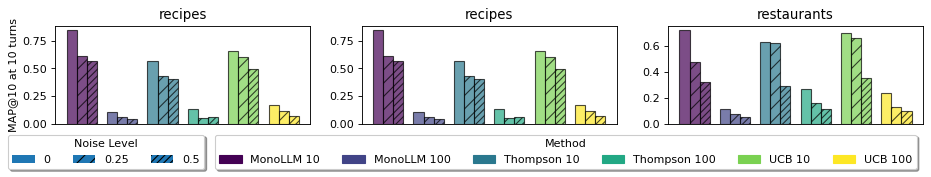

In [39]:
def map_10_10_items():
    # MAP@10 big plot
    folder_path = "./"
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['MonoLLM 10', 'MonoLLM 100', 'Thompson 10', 'Thompson 100', 'UCB 10', 'UCB 100',]
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 2), dpi=80)

    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    color_map = {methods[i]: colors[i] for i in range(len(methods))}

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(datasets[axis_num])

        x = np.arange(len(methods))  # the label locations
        width = 0.25  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels)))
        # results_error = np.zeros((len(methods), len(noise_levels)))

        # Just hard-code it all lol
        for noise_count, noise_level in enumerate(noise_levels): # Fill results array
            # Load in best results
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/noise{noise_level}/aggregated_results.csv")
            results[1, noise_count] = exp_results.loc[0, "map@9"] # MonoLLM 100
            results[3, noise_count] = exp_results.loc[4, "map@9"] # Thompson 100
            results[5, noise_count] = exp_results.loc[5, "map@9"] # UCB 100

        mono_10_exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/10_items/mono/aggregated_results.csv")
        for noise_count, noise_level in enumerate(noise_levels):
            results[0, noise_count] = mono_10_exp_results.loc[noise_count, "map@9"] # Mono 10

        dt_10_exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/10_items/aggregated_results.csv")
        dt_10_noise_levels = [2,0,1] # Noise is in the wrong order in this file for some reason
        for noise_count, noise_level in enumerate(noise_levels):
            results[2, noise_count] = dt_10_exp_results.loc[(2*dt_10_noise_levels[noise_count]), "map@9"] # Thompson 10
            results[4, noise_count] = dt_10_exp_results.loc[(2*dt_10_noise_levels[noise_count])+1, "map@9"] # UCB 10

        # Plot bars on subplot
        multiplier = 0
        for col_num, noise_level in enumerate(noise_levels):
            offset = width * multiplier
            # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
            rects = ax.bar(x + offset, results[:,col_num], width, hatch=hatches[col_num], color=colors, label=noise_level, edgecolor = "black", alpha=0.7)
            # error_bars = ax.errorbar(x + offset, results[:,col_num], yerr=results_error[:,col_num], color="black")
            # ax.bar_label(rects, padding=3)
            multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in methods], title='Method', loc='upper center', bbox_to_anchor=(0.8, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            # Opacity legend
            # alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_patches = [mpatches.Patch(hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            # noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise Level', loc='upper center', bbox_to_anchor=(-1, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "big_MAPat10_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_10_items()

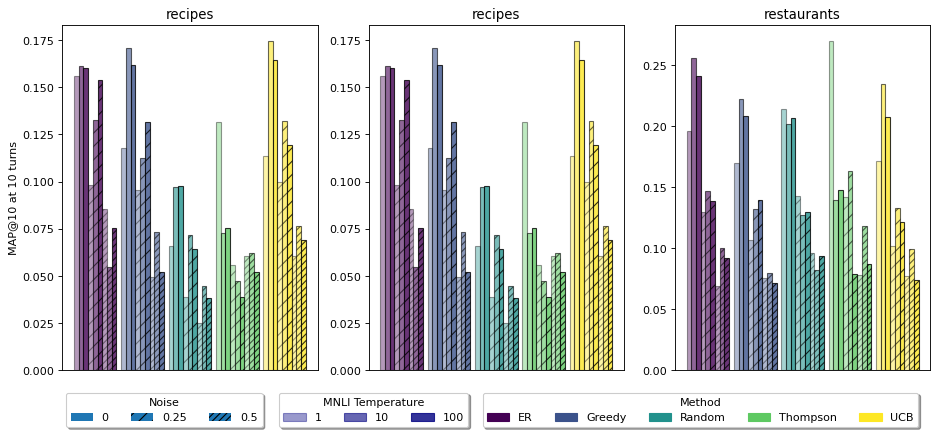

In [21]:
def map_10_temp():
    # MAP@10 big plot
    folder_path = "./"
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    temps = ['1', '10', '100']
    alphas = [0.4, 0.6, 0.8]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 7), dpi=80)  

    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(datasets[axis_num])

        x = np.arange(len(methods))  # the label locations
        width = 0.1  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels), len(temps)))
        results_error = np.zeros((len(methods), len(noise_levels), len(temps)))

        for method_idx, method in enumerate(methods):
            for noise_count, noise_level in enumerate(noise_levels): # Fill results array
                exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/{method}/noise{noise_level}/aggregated_results.csv")
                for row_num in range(len(exp_results)):
                    results[method_idx, noise_count, row_num] = exp_results.loc[row_num, "map@9"]
                    results_error[method_idx, noise_count, row_num] = exp_results.loc[row_num, "map@9_ub"] - exp_results.loc[row_num, "map@9_lb"]

        # Plot bars on subplot
        multiplier = 0
        for col_num, noise_level in enumerate(noise_levels):
            for temp_idx, temp in enumerate(temps):
                offset = width * multiplier
                # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
                rects = ax.bar(x + offset, results[:,col_num, temp_idx], width, hatch=hatches[col_num], alpha=alphas[temp_idx], color=colors, label=noise_level, edgecolor = "black")
                # error_bars = ax.errorbar(x + offset, results[:,col_num, temp_idx], yerr=results_error[:,col_num], color="black")
                # ax.bar_label(rects, padding=3)
                multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in methods], title='Method', loc='upper center', bbox_to_anchor=(1.3, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            noise_patches = [mpatches.Patch(hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise', loc='upper center', bbox_to_anchor=(-0.8, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))
            
            # Opacity legend
            alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=temps[i]) for i in range(len(noise_levels))]
            temp_legend = plt.legend(handles=alpha_patches, title='MNLI Temperature', loc='upper center', bbox_to_anchor=(0.02, -0.05),
                    fancybox=True, shadow=True, ncol=len(temps))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)
            plt.gca().add_artist(noise_legend)

    # Save and show 
    file_name = "big_MAPat10_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_temp()

### Cumulative Regret Plot

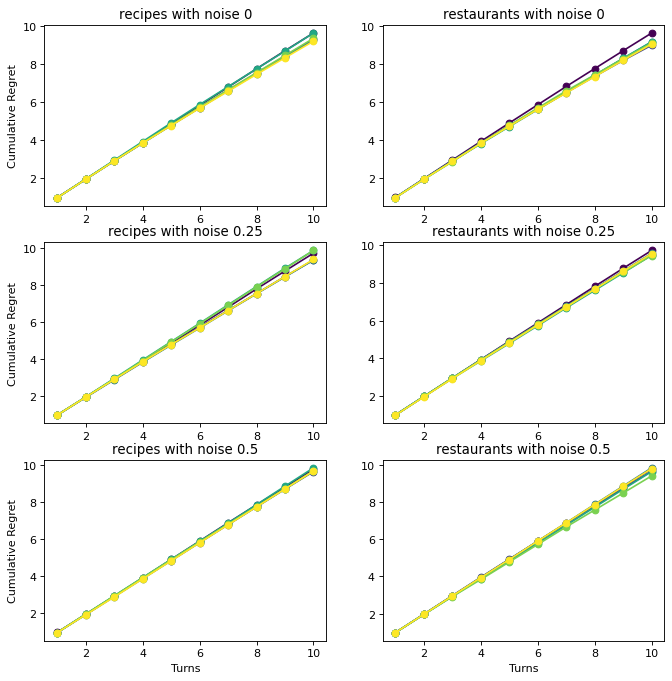

In [28]:
def cum_regret():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10

    fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(10,10), dpi=80)

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] #TODO: Split on more than just color

    for noise_idx, noise_level in enumerate(noise_levels):

        for dataset_idx, dataset in enumerate(datasets):
            
            axs[noise_idx, dataset_idx].set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                cum_regret = 0.0
                for turn in range(num_turns):
                    cum_regret += (1 - results_df.loc[row_num, 'P_1@%d' % turn])
                    row_maps.append(cum_regret)

                # TODO: Change this to use different kwargs for each method rather than only colors
                axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker="o", linestyle="solid", color=colors[row_num], label=methods)

                if dataset_idx == 0:
                    # Add y-axis label if left-hand subplot
                    axs[noise_idx, dataset_idx].set_ylabel(f"Cumulative Regret")

                if noise_idx == (len(noise_levels) - 1):
                    # Add x-axis label if bottom subplot
                    axs[noise_idx, dataset_idx].set_xlabel(f"Turns")

    # Save and show 
    file_name = "big_cum_regret_plot.png"
    fig.savefig(file_name)

    plt.show()

cum_regret()

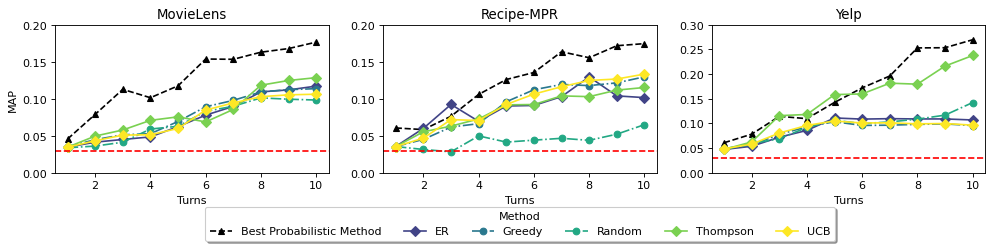

In [14]:
def map_plot_noise0_mnli0():
    datasets = ['movies', 'recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.2,0.2,0.3]

    titles = ['MovieLens', 'Recipe-MPR', 'Yelp']


    omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    # omit = [
    #     ['Greedy','Random'],
    #     ['Greedy','Random'],
    #     ['Greedy','Random']
    # ]

    # omit = [
    #     ['Greedy','Random'],
    #     ['Greedy','Random'],
    #     ['Greedy','Random']
    # ]

    # omit = [
    #     ['MonoLLM','UCB'],
    #     ['MonoLLM','Thompson'],
    #     ['MonoLLM','UCB']
    # ]

    baselines = [ # row number of the best method in our methods with T =/= 0
        4,5,4
    ]

    # omit = [
    #     ['MonoLLM'],
    #     ['MonoLLM'],
    #     ['MonoLLM']
    # ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': 'black', 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/mnli0/aggregated_results.csv")

        # Plot baseline result
        baseline_results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        baseline_row_maps = []
        for turn in range(num_turns):
                baseline_row_maps.append(baseline_results_df.loc[baselines[dataset_idx], 'map@%d' % turn])
        ax.plot(np.linspace(1,num_turns,num_turns), baseline_row_maps, marker=linetypes[0]['marker'], linestyle=linetypes[0]['line'], color=linetypes[0]['color'], label="Best Probabilistic Method")

        for row_num in range(len(results_df)):
            if (methods[row_num+1] in omit[dataset_idx]):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num+1]['marker'], linestyle=linetypes[row_num+1]['line'], color=linetypes[row_num+1]['color'], label=methods[row_num+1])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP")
            
            # Add legend above middle plot
            if dataset_idx == 1:
                methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")


        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_mnli0()

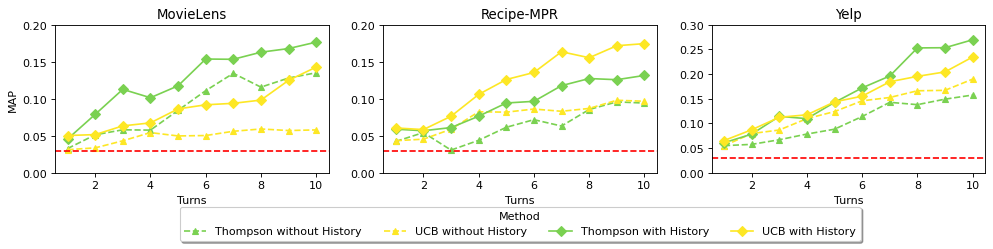

In [24]:
def map_plot_no_history():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['movies', 'recipes', 'restaurants']
    titles = ['MovieLens', 'Recipe-MPR', 'Yelp']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.2,0.2,0.3]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    # keep_subset = [
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    # ]

    keep_subset = [
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
    ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        no_hist_results_df = pd.read_csv(f"organized_results/{dataset}/no_history/aggregated_results.csv")
        
        for row_num in range(len(no_hist_results_df)):
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(no_hist_results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker="^", linestyle="dashed", color=linetypes[row_num+4]['color'], label=f"{methods[row_num+4]} without History")

        best_results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")


        # NOTE: Some hard-coding here
        thompson_maps = []
        for turn in range(num_turns):
            thompson_maps.append(best_results_df.loc[4, 'map@%d' % turn])

        ax.plot(np.linspace(1,num_turns,num_turns), thompson_maps, marker="D", linestyle="solid", color=linetypes[4]['color'], label="Thompson with History")
        
        ucb_maps = []
        for turn in range(num_turns):
            ucb_maps.append(best_results_df.loc[5, 'map@%d' % turn])
            
        ax.plot(np.linspace(1,num_turns,num_turns), ucb_maps, marker="D", linestyle="solid", color=linetypes[5]['color'], label="UCB with History")


        ax.set_ylim(0,y_maxs[dataset_idx])

        if dataset_idx == 0:
            # Add y-axis label if left-hand subplot
            ax.set_ylabel(f"MAP")
            
        # Add legend above middle plot
        if dataset_idx == 1:       
            methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=4)

        ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_no_history()

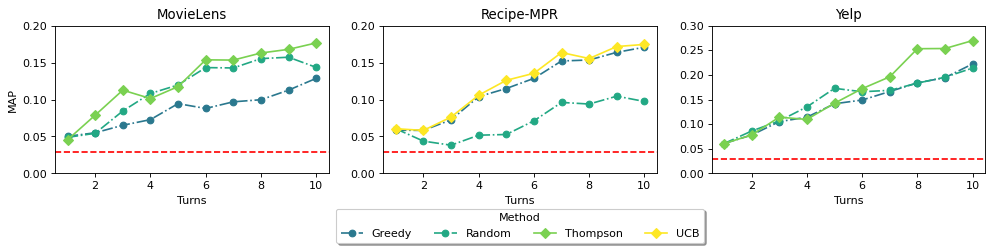

In [ ]:
def map_plot_noise0_row():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['movies', 'recipes', 'restaurants']
    titles = ['MovieLens', 'Recipe-MPR', 'Yelp']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.2,0.2,0.3]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    # keep_subset = [
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    # ]

    keep_subset = [
        ['Thompson', 'Random', 'Greedy'],
        ['UCB', 'Random', 'Greedy'],
        ['Thompson', 'Random', 'Greedy'],
    ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    # For when not all lines are in every plot
    total_keeps = ['Greedy','Random','Thompson','UCB']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))


    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num] in keep_subset[dataset_idx])):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods[row_num])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP")
            
            # Add legend above middle plot
            if dataset_idx == 1:
                methods_legend = plt.legend(methods_handles, total_keeps, title='Method', loc='upper center', bbox_to_anchor=(0.5, -0.2),
                        fancybox=True, shadow=True, ncol=len(methods))
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_row()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


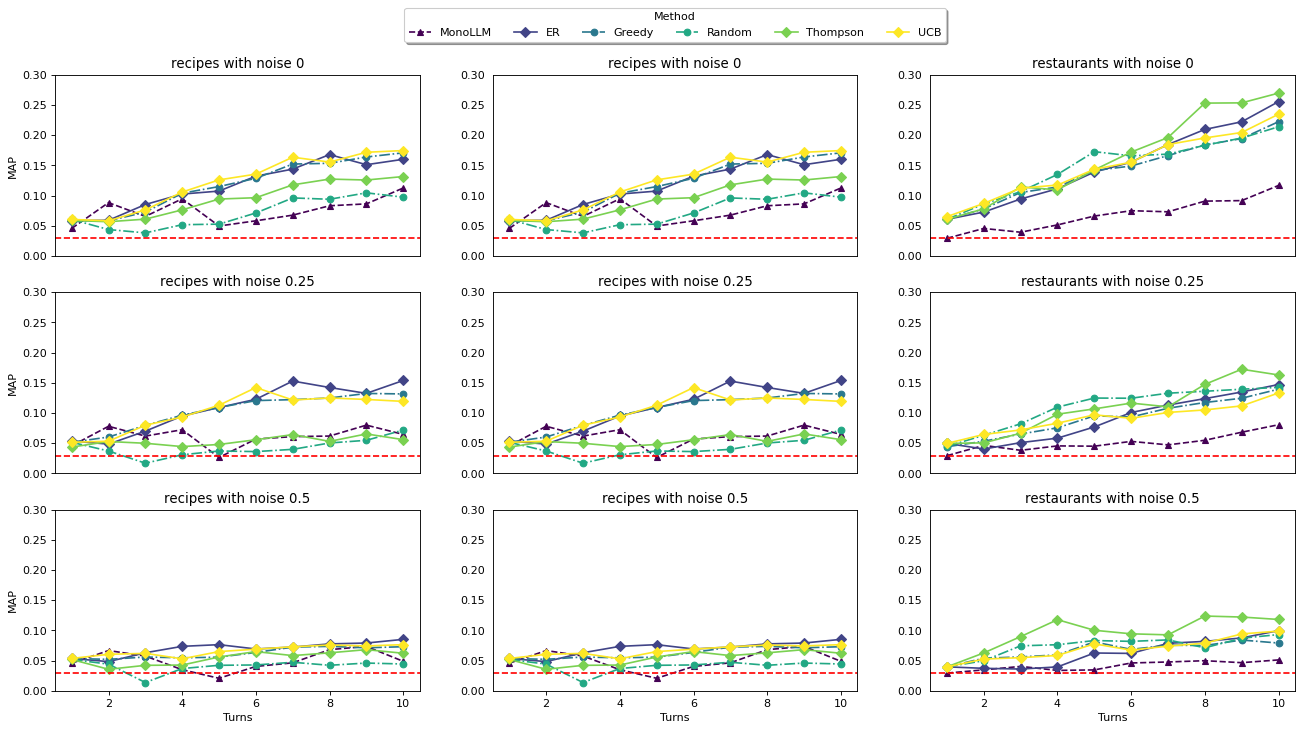

In [3]:
def map_plot_noise_grid():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(20, 10), dpi=80)  

    for dataset_idx, dataset in enumerate(datasets):

        for noise_idx, noise_level in enumerate(noise_levels):

            axs[noise_idx, dataset_idx].set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                for turn in range(num_turns):
                    row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods[row_num])

                axs[noise_idx, dataset_idx].set_ylim(0,y_max)

                if dataset_idx == 0:
                    # Add y-axis label if left-hand subplot
                    axs[noise_idx, dataset_idx].set_ylabel(f"MAP")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='y',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        right=False,      # ticks along the bottom edge are off
                        left=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

                if noise_idx+1 == len(noise_levels):
                    axs[noise_idx, dataset_idx].set_xlabel(f"Turns")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='x',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

            p_select_position = 1 / num_items
            total_maps = 0.0
            for i in range(num_recs):
                total_maps += (1 / (i+1))
            total_maps *= p_select_position
            # print(total_maps)
            axs[noise_idx, dataset_idx].axhline(y=total_maps, color="r", linestyle="--")

            # # Shrink current axis's height by 10% on the bottom for legends
            # box = axs[noise_idx, dataset_idx].get_position()
            # axs[noise_idx, dataset_idx].set_position([box.x0, box.y0 + box.height * 0.1,
            #                 box.width, box.height * 0.9])
            
        methods_legend = axs[0, 1].legend(title='Method', loc='upper center', bbox_to_anchor=(0.5, 1.4),
            fancybox=True, shadow=True, ncol=len(methods))

    # Save and show 
    file_name = "big_map_grid_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise_grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


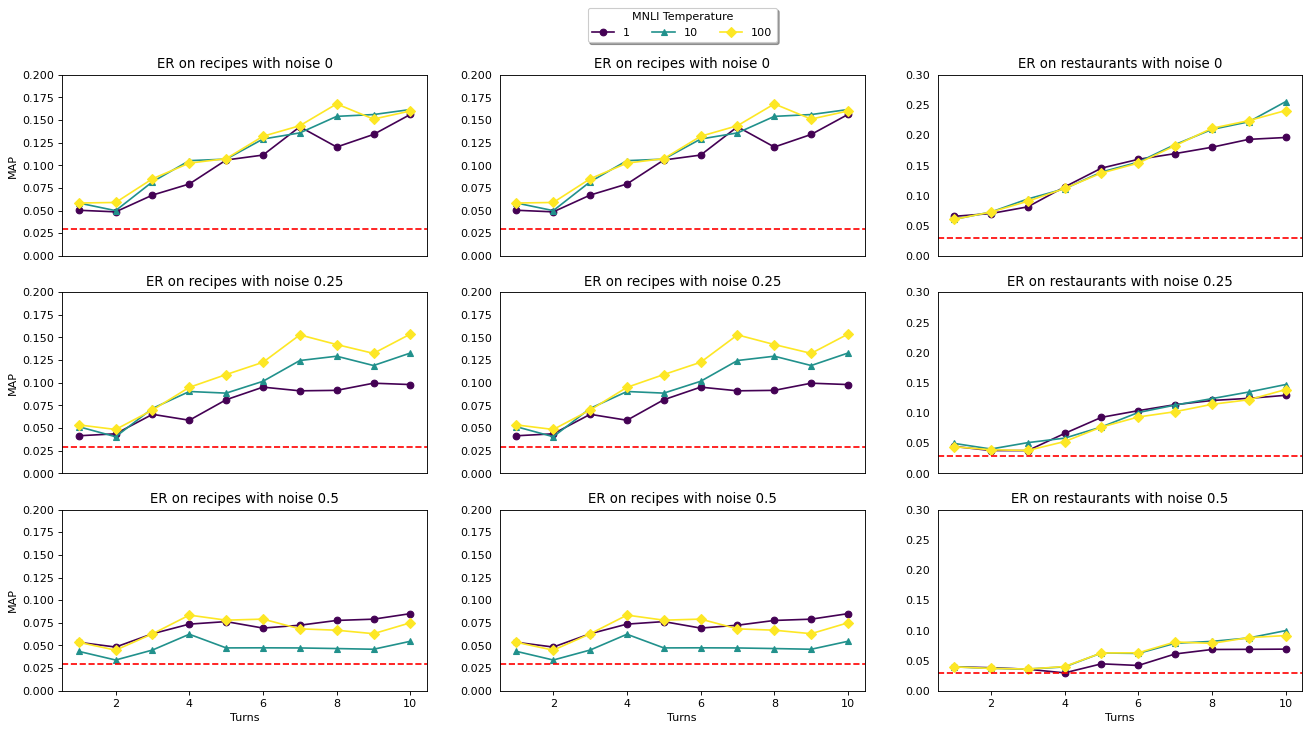

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


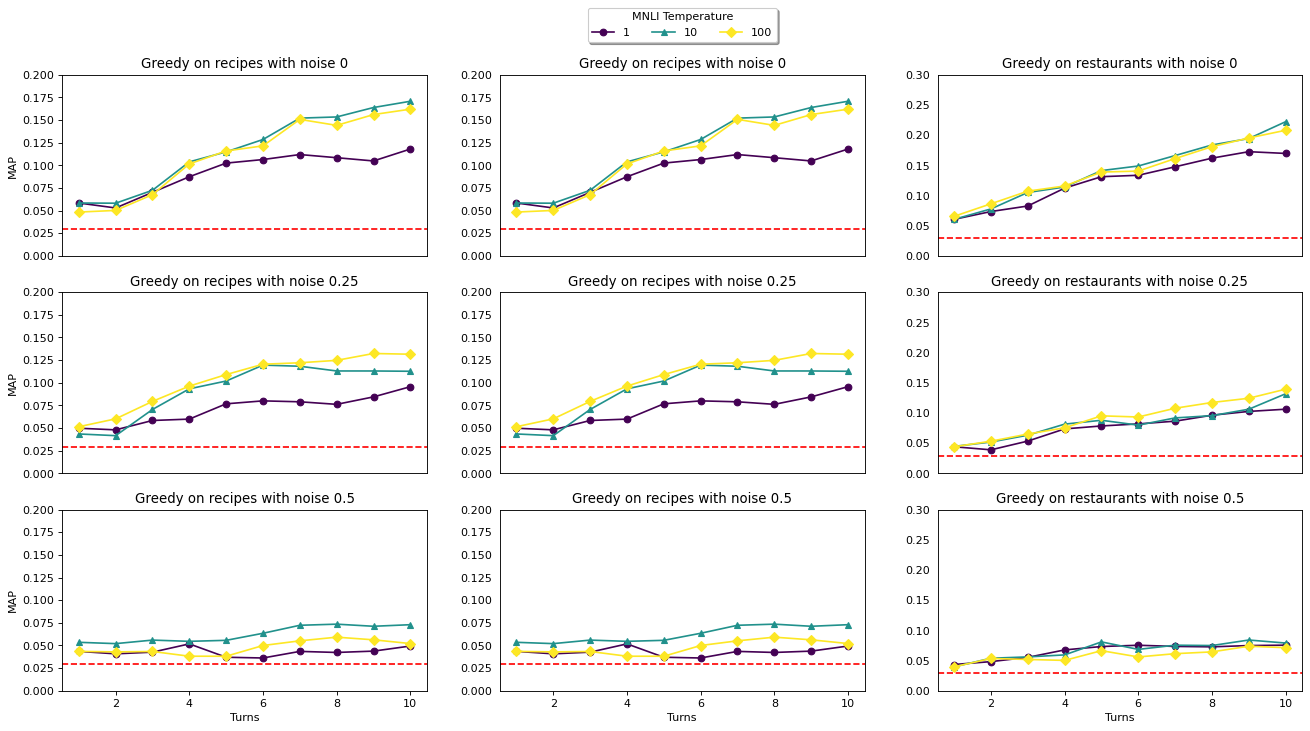

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


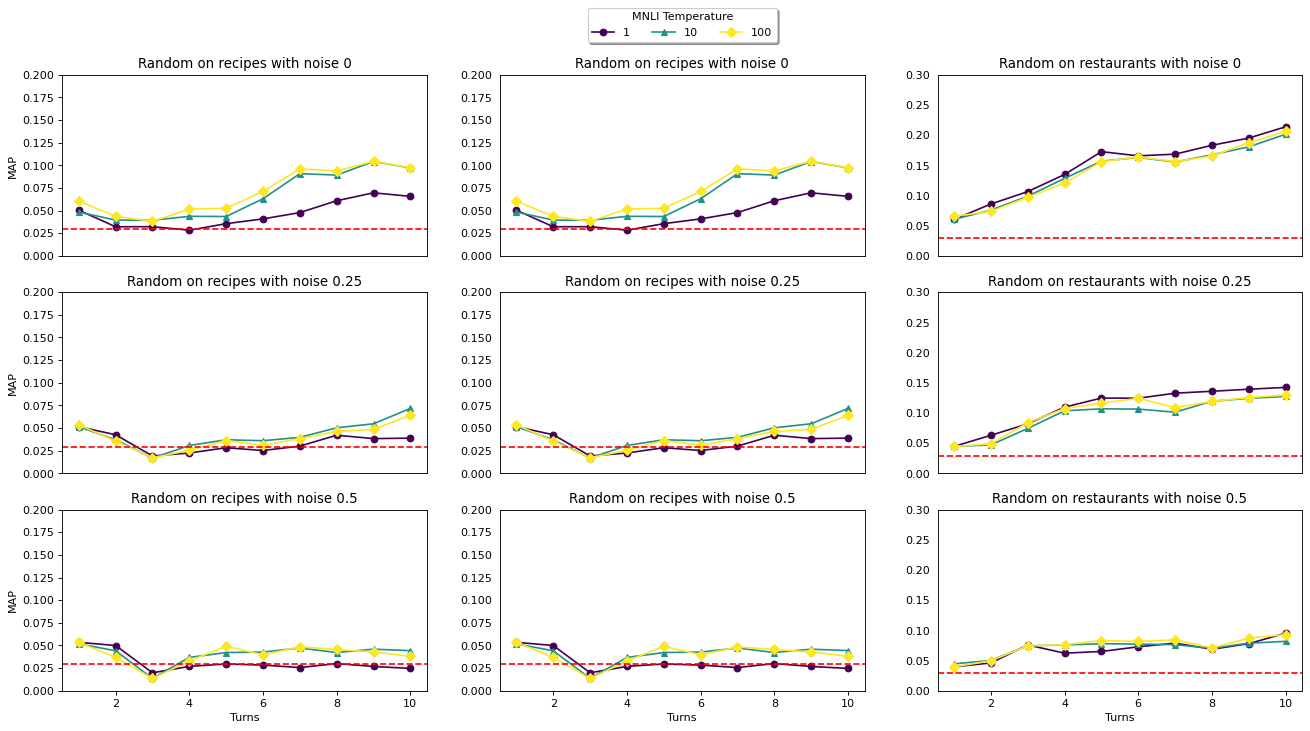

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


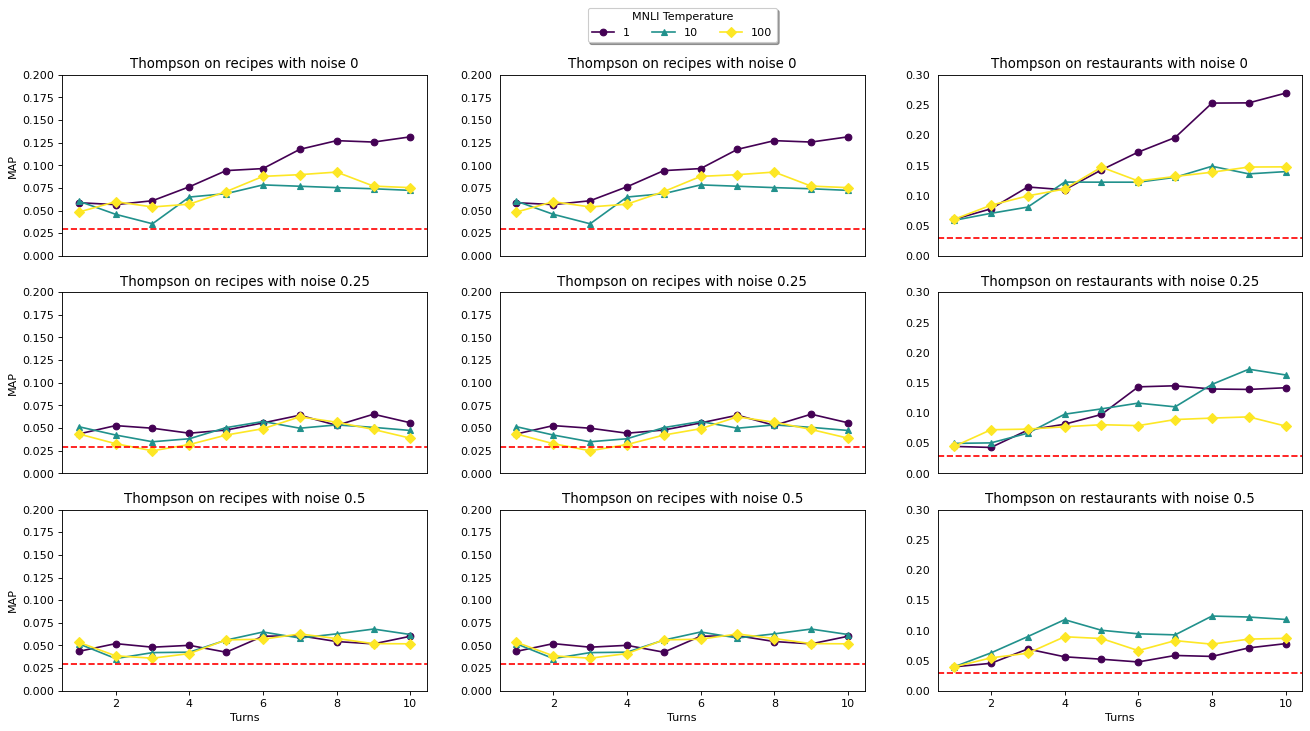

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


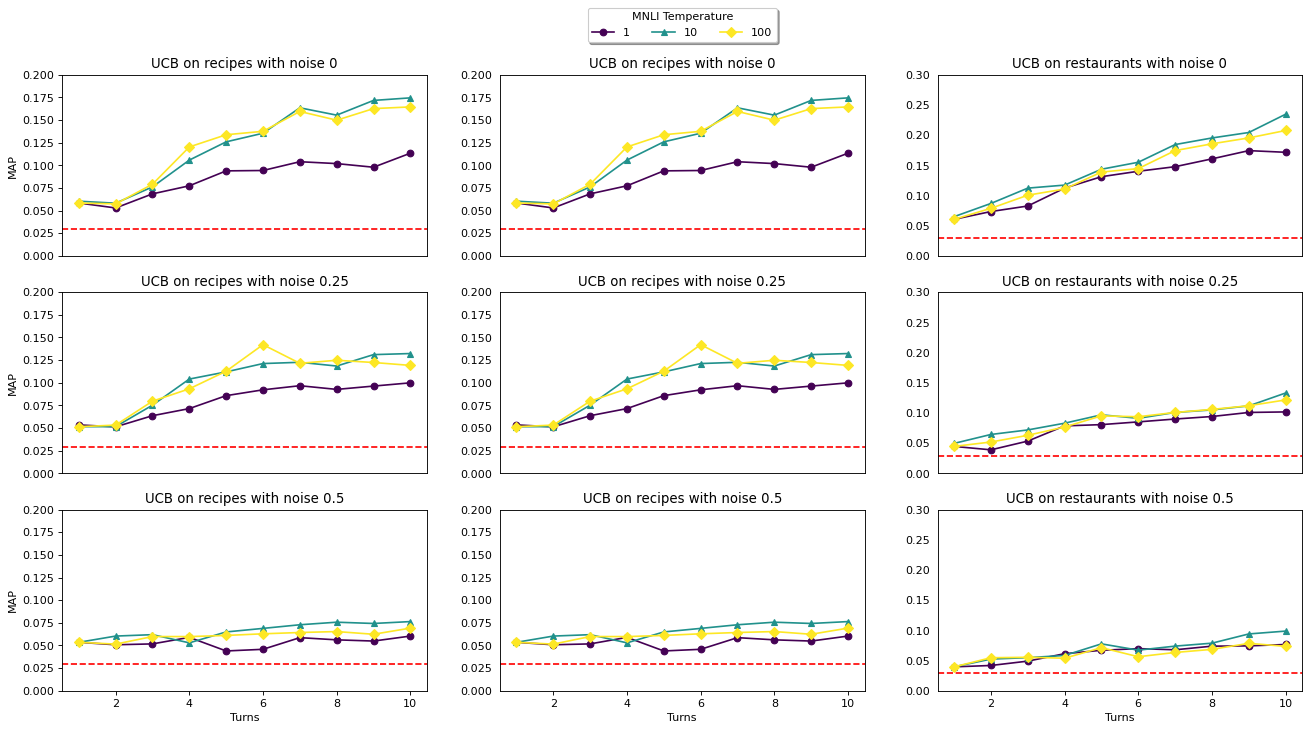

In [4]:
def map_plot_temp_grid():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    temps = [1,10,100]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.2, 0.2, 0.3]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(temps))] 

    linetypes = [
        {'color': colors[0], 'marker': 'o', 'line': 'solid'}, 
        {'color': colors[1], 'marker': '^', 'line': 'solid'},
        {'color': colors[2], 'marker': 'D', 'line': 'solid'},
    ]

    for method in methods:

        fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(20, 10), dpi=80)     

        for dataset_idx, dataset in enumerate(datasets):

            for noise_idx, noise_level in enumerate(noise_levels):

                axs[noise_idx, dataset_idx].set_title(f"{method} on {dataset} with noise {noise_level}")

                results_df = pd.read_csv(f"organized_results/{dataset}/{method}/noise{noise_level}/aggregated_results.csv")

                for row_num in range(len(results_df)):
                    row_maps = []
                    for turn in range(num_turns):
                        row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                    axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=temps[row_num])

                    axs[noise_idx, dataset_idx].set_ylim(0,y_maxs[dataset_idx])

                    if dataset_idx == 0:
                        # Add y-axis label if left-hand subplot
                        axs[noise_idx, dataset_idx].set_ylabel(f"MAP")
                    else:
                        axs[noise_idx, dataset_idx].tick_params(
                            axis='y',          # changes apply to the y-axis
                            which='both',      # both major and minor ticks are affected
                            right=False,      # ticks along the bottom edge are off
                            left=False,         # ticks along the top edge are off
                            labelbottom=False) # labels along the bottom edge are off

                    if noise_idx+1 == len(noise_levels):
                        axs[noise_idx, dataset_idx].set_xlabel(f"Turns")
                    else:
                        axs[noise_idx, dataset_idx].tick_params(
                            axis='x',          # changes apply to the y-axis
                            which='both',      # both major and minor ticks are affected
                            bottom=False,      # ticks along the bottom edge are off
                            top=False,         # ticks along the top edge are off
                            labelbottom=False) # labels along the bottom edge are off

                p_select_position = 1 / num_items
                total_maps = 0.0
                for i in range(num_recs):
                    total_maps += (1 / (i+1))
                total_maps *= p_select_position
                # print(total_maps)
                axs[noise_idx, dataset_idx].axhline(y=total_maps, color="r", linestyle="--")

                # # Shrink current axis's height by 10% on the bottom for legends
                # box = axs[noise_idx, dataset_idx].get_position()
                # axs[noise_idx, dataset_idx].set_position([box.x0, box.y0 + box.height * 0.1,
                #                 box.width, box.height * 0.9])
                
            temps_legend = axs[0, 1].legend(title='MNLI Temperature', loc='upper center', bbox_to_anchor=(0.5, 1.4),
                fancybox=True, shadow=True, ncol=len(temps))

        # Save and show 
        file_name = f"big_mnli_temp_map_grid_plot_{method}.png"
        fig.savefig(file_name)

        plt.show()

map_plot_temp_grid()

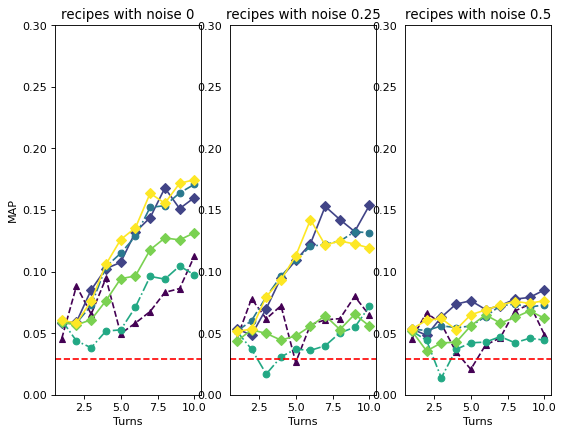

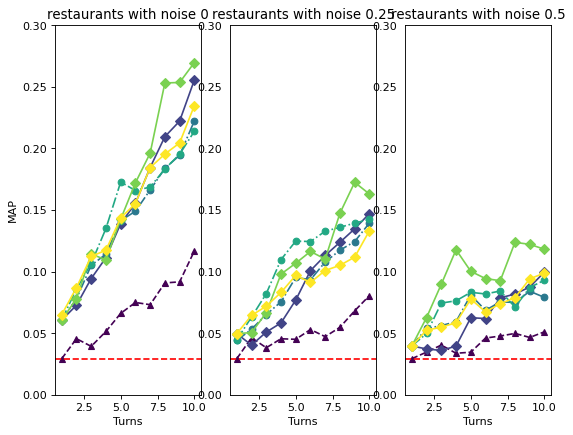

In [60]:
def map_binary_vs_prob():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    

    for dataset_idx, dataset in enumerate(datasets):

        fig = plt.figure(figsize=(8, 6), dpi=80)  

        for noise_idx, noise_level in enumerate(noise_levels):

            ax = fig.add_subplot(1,len(noise_levels), noise_idx+1)

            ax.set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                for turn in range(num_turns):
                    row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods)

                ax.set_ylim(0,y_max)

                if noise_idx == 0:
                    # Add y-axis label if left-hand subplot
                    ax.set_ylabel(f"MAP")
                else:
                    ax.tick_params(
                        axis='y',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        right=False,      # ticks along the bottom edge are off
                        left=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

                ax.set_xlabel(f"Turns")

            p_select_position = 1 / num_items
            total_maps = 0.0
            for i in range(num_recs):
                total_maps += (1 / (i+1))
            total_maps *= p_select_position
            # print(total_maps)
            ax.axhline(y=total_maps, color="r", linestyle="--")

        # Save and show 
        file_name = "big_map_plot.png"
        fig.savefig(file_name)

        plt.show()

map_binary_vs_prob()